In [2]:
import pandas as pd

In [3]:
print(pd.read_csv('cleaned_playstore_data.csv'))

                                                    App        Category  \
0        Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN   
1                                   Coloring book moana  ART_AND_DESIGN   
2     U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN   
3                                 Sketch - Draw & Paint  ART_AND_DESIGN   
4                 Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN   
...                                                 ...             ...   
9140                                           FR Forms        BUSINESS   
9141                                   Sya9a Maroc - FR          FAMILY   
9142                   Fr. Mike Schmitz Audio Teachings          FAMILY   
9143                             Parkinson Exercices FR         MEDICAL   
9144      iHoroscope - 2018 Daily Horoscope & Astrology       LIFESTYLE   

      Rating   Reviews        Size  Installs  Type  Price Content Rating  \
0        4.1     159.0 

In [4]:
data=pd.read_csv('cleaned_playstore_data.csv')
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Revenue
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,0.0


In [6]:
filtered_data = data[
    (data["Installs"] >= 10000) &
    (data["Revenue"] >= 10000) &
    (data["Android Ver"].str.contains("4.", na=False)) &  #Check if Android version is at least 4.0
    (data["Size"] >= 15000000) &
    (data["Content Rating"] == "Everyone") &
    (data["App"].str.len() <= 30)
]

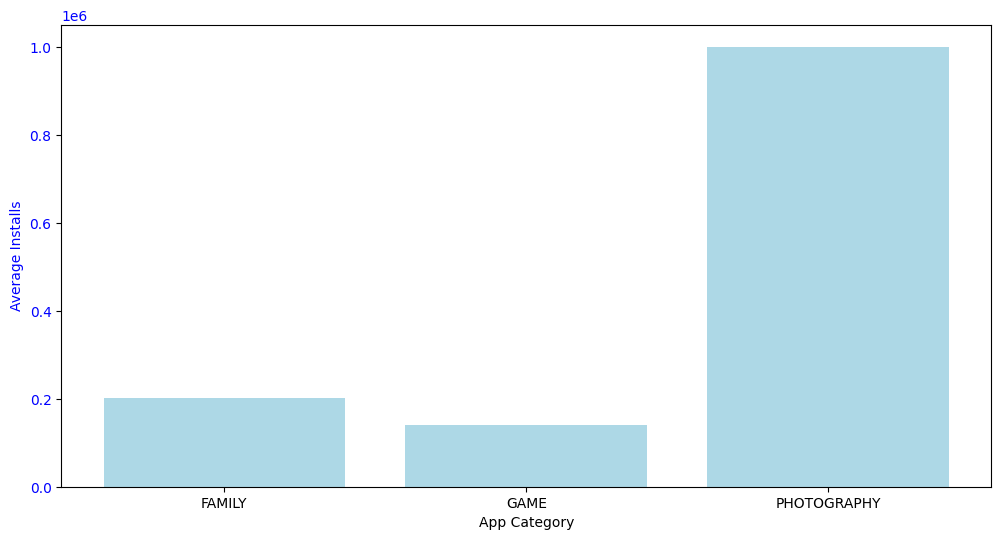

In [7]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("App Category")
ax1.set_ylabel("Average Installs", color="blue")
ax1.bar(grouped_data["Category"], grouped_data["Installs"], color="lightblue", label="Average Installs")
ax1.tick_params(axis="y", labelcolor="blue")



In [8]:
ax2 = ax1.twinx()
ax2.set_ylabel("Average Revenue", color="red")
ax2.plot(grouped_data["Category"], grouped_data["Revenue"], color="red", marker="o", label="Average Revenue")
ax2.tick_params(axis="y", labelcolor="red")


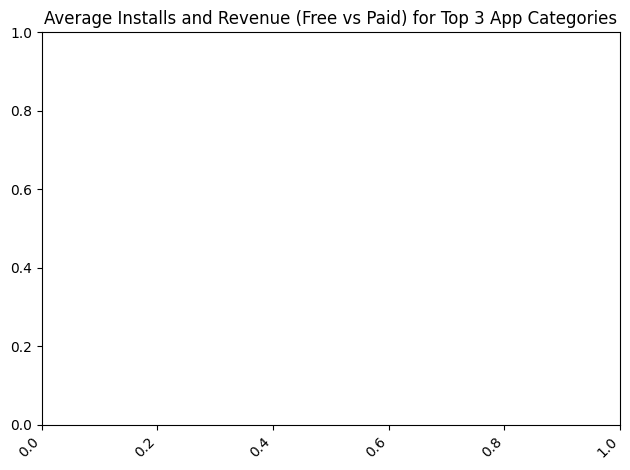

In [9]:
plt.title("Average Installs and Revenue (Free vs Paid) for Top 3 App Categories")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


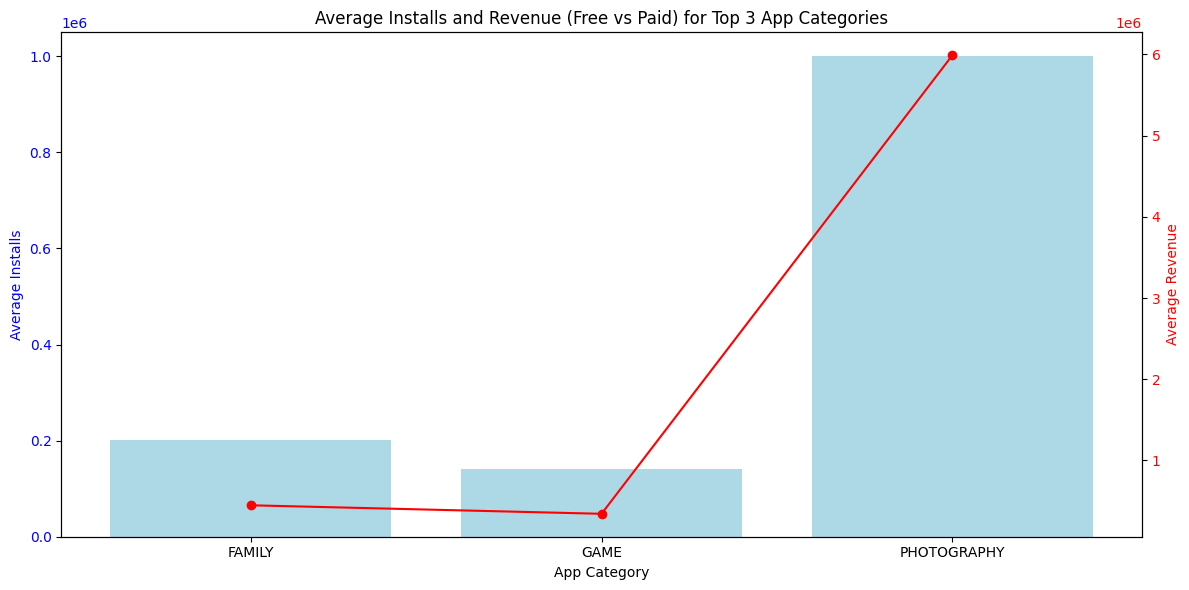

In [5]:
# Dual-Axis Chart: Compare the average installs and revenue for free vs. paid apps within the top 3 app categories. Exclude apps with fewer than 10,000 installs, revenue below $10,000, Android version below 4.0, size below 15 MB, content rating not "Everyone," and app names longer than 30 characters. This graph should be displayed only between 1 PM IST and 2 PM IST.

import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Filter out apps based on the given criteria
filtered_data = data[
    (data["Installs"] >= 10000) &
    (data["Revenue"] >= 10000) &
    (data["Android Ver"].str.contains("4.", na=False)) &  #Check if Android version is at least 4.0
    (data["Size"] >= 15000000) &
    (data["Content Rating"] == "Everyone") &
    (data["App"].str.len() <= 30)
]


# Get the top 3 app categories
top_categories = filtered_data["Category"].value_counts().nlargest(3).index


# Filter the data for the top categories
category_data = filtered_data[filtered_data["Category"].isin(top_categories)]


# Group by category and app type (free or paid) and calculate the mean installs and revenue
grouped_data = category_data.groupby(["Category", "Type"])[["Installs", "Revenue"]].mean().reset_index()


# Create the dual-axis chart

fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("App Category")
ax1.set_ylabel("Average Installs", color="blue")
ax1.bar(grouped_data["Category"], grouped_data["Installs"], color="lightblue", label="Average Installs")
ax1.tick_params(axis="y", labelcolor="blue")


# Create a second y-axis for revenue
ax2 = ax1.twinx()
ax2.set_ylabel("Average Revenue", color="red")
ax2.plot(grouped_data["Category"], grouped_data["Revenue"], color="red", marker="o", label="Average Revenue")
ax2.tick_params(axis="y", labelcolor="red")


# Customize the plot
plt.title("Average Installs and Revenue (Free vs Paid) for Top 3 App Categories")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()


# Display chart only within specified time range
now = datetime.datetime.now()
current_hour = now.hour
current_minute = now.minute


if 13 <= current_hour <= 14:
    plt.show()
else:
    print("The graph is available for display between 1 PM and 2 PM IST")
